Por: 

Emilia Victoria Jácome Iñiguez - A00828347

Gilberto Ramos Salinas - A01734128

Aylin Camacho - A01379272

Luis Daniel Cano - A00827178

Maximiliano Martínez Márquez - A01251527

# **Preliminares**

***Fuente de Datos:*** [Click Aquí](https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset)

## Importar Librerías Generales

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import html5lib as ht

#Importar el dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/Shareddrives/Los Nietos de Gauss/Real State/DB

/content/drive/Shareddrives/Los Nietos de Gauss/Real State/DB


## Definir los dataframes

In [4]:
df = pd.read_csv('real_state.csv') #generar el dataframe con los datos de Real State
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


# **Visualización de la Data**

Histograma de Número de Habitaciones

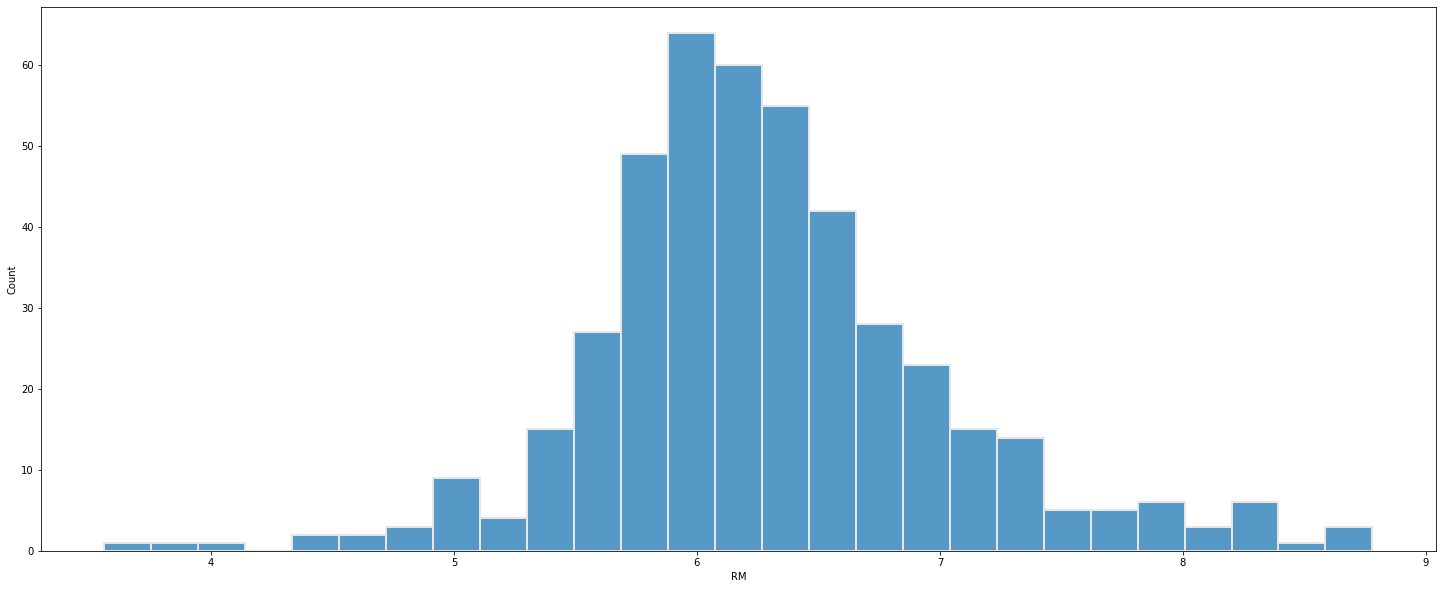

In [5]:
df_RM = df.groupby(["RM"]).sum()
plt.figure(figsize=(25,10))
g = sns.histplot(df_RM, x="RM", linewidth=2, edgecolor=".9")

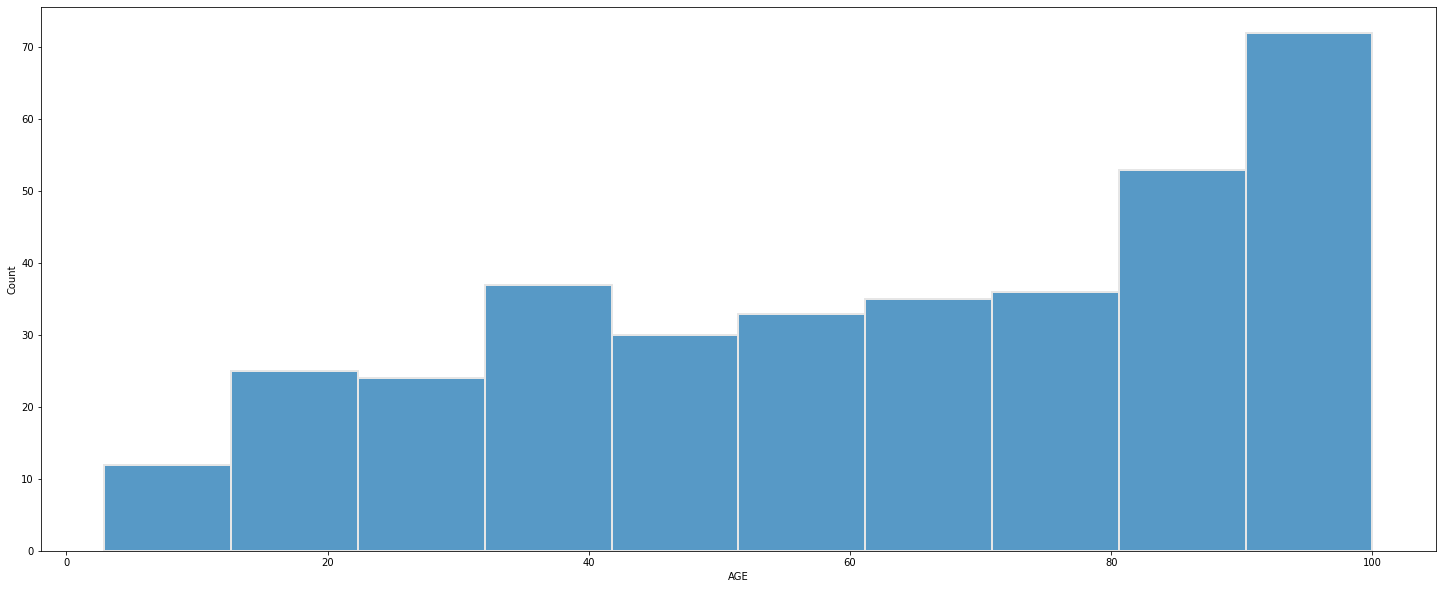

In [6]:
df_AGE = df.groupby(["AGE"]).count()
plt.figure(figsize=(25,10))
g = sns.histplot(df_AGE, x="AGE", linewidth=2, edgecolor=".9")

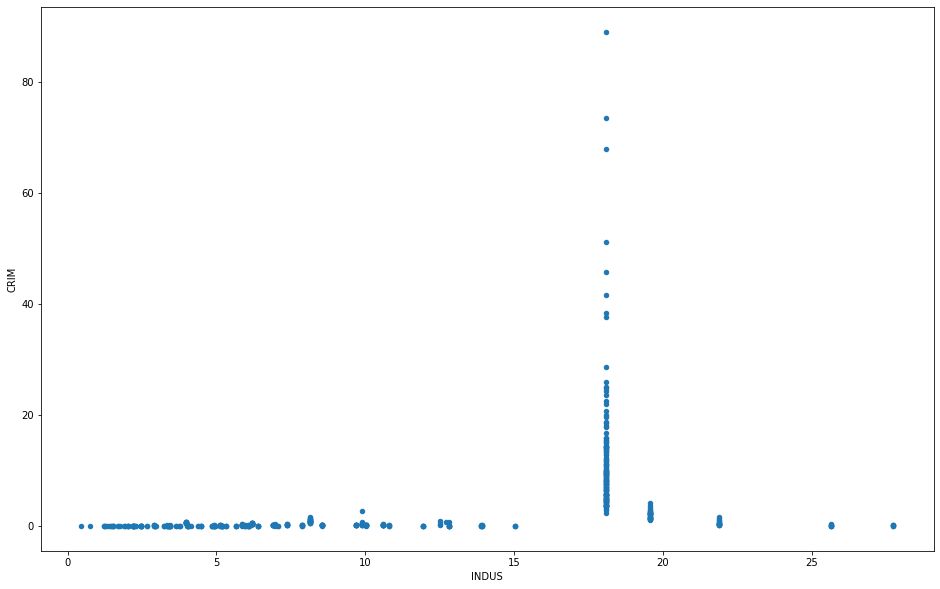

In [7]:
df.plot.scatter(y='CRIM', x='INDUS',figsize=(16,10))

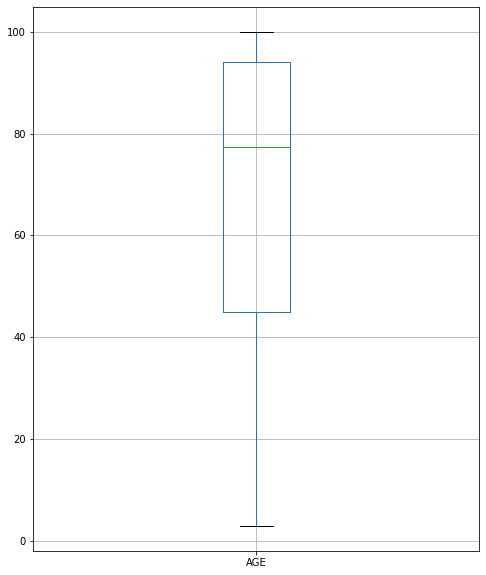

In [8]:
df.boxplot(column='AGE', figsize=(8,10))

In [9]:
fig = px.scatter(df, x="AGE", y="LSTAT",
            log_x=True, size_max=60)
fig.show()

# **Exploración de Datos**

In [10]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


##Descripción de Campos

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


* **ZN:** proportion of residential land zoned for lots over
25,000 sq.ft.
* **INDUS:** proportion of non-retail business acres per town
* **CHAS:** Charles River dummy variable (= 1 if tract bounds
river; 0 otherwise)
* **NOX:** nitric oxides concentration (parts per 10 million)
* **RM:** average number of rooms per dwelling
* **AGE:** proportion of owner-occupied units built prior to 1940
* **DIS:** weighted distances to five Boston employment centres
* **RAD:** index of accessibility to radial highways
* **TAX:** full-value property-tax rate per $10,000

* **PTRATIO:** pupil-teacher ratio by town
* **B:** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT:** % lower status of the population
* **MEDV:** Median value of owner-occupied homes in $1000's

In [12]:
##Mostrar dimensiones del dataset
df.shape
#511 reglones y 14 columnas

(511, 14)

## Tipos de Datos

In [13]:
##Resumen del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [14]:
##Ver el tipo de Datos
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Medidas Estadísticas de los datos

In [15]:
##Descripción de Variables Numéricas
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,511.0,3.584139,8.564433,0.00632,0.082325,0.26169,3.621175,88.9762
ZN,511.0,11.252446,23.234838,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,511.0,11.151096,6.828175,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,511.0,0.068493,0.252838,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,511.0,0.554757,0.115310,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.287589,0.703802,3.56100,5.885500,6.20900,6.629750,8.7800
AGE,511.0,68.616243,28.099130,2.90000,45.050000,77.30000,94.050000,100.0000
DIS,511.0,3.783876,2.098631,1.12960,2.100350,3.15230,5.118000,12.1265
RAD,511.0,9.485323,8.688469,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,511.0,407.440313,167.903532,187.00000,279.500000,330.00000,666.000000,711.0000


In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR

CRIM         3.53885
ZN          12.50000
INDUS       12.91000
CHAS         0.00000
NOX          0.17500
RM           0.74425
AGE         49.00000
DIS          3.01765
RAD         20.00000
TAX        386.50000
PTRATIO      2.80000
B           21.50000
LSTAT       10.04000
MEDV         7.95000
dtype: float64

In [18]:
minn = Q1 - 3 * IQR
maxx = Q3 + 3 * IQR
out_lier = df[(df < minn)  | (df > maxx)].count()
out_lier

CRIM       34
ZN         45
INDUS       0
CHAS       35
NOX         0
RM          1
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B          58
LSTAT       1
MEDV       18
dtype: int64

In [19]:
outlier_ratio  = out_lier/df.count()
outlier_ratio

CRIM       0.066536
ZN         0.088063
INDUS      0.000000
CHAS       0.068493
NOX        0.000000
RM         0.001976
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.113503
LSTAT      0.001957
MEDV       0.035225
dtype: float64

## Revisar inconsistencias

In [20]:
##Checar valores no nulos
df.notnull().sum()

CRIM       511
ZN         511
INDUS      511
CHAS       511
NOX        511
RM         506
AGE        511
DIS        511
RAD        511
TAX        511
PTRATIO    511
B          511
LSTAT      511
MEDV       511
dtype: int64

In [21]:
##Checar valores nulos
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [22]:
##Checar blancos
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [23]:
def Missing_Values(data):
    variable_name=[]
    total_value=[]
    total_missing_value=[]
    missing_value_rate=[]
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],3))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,"Total_Value":total_value,\
                             "Total_Missing_Value":total_missing_value,"Missing_Value_Rate":missing_value_rate,
                             "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value})
    return missing_data.sort_values("Missing_Value_Rate",ascending=False)

# **Transformación de Datos**

In [24]:
RM_median = df['RM'].median()
RM_median

6.209

In [25]:
df['RM'].fillna(value=RM_median, inplace=True)

In [26]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Rellenar los valores blancos con la media de la columna para que no se alteren los resultados

##Rellenar valores Nulos

In [27]:
df_out_lier_cleaned = df[~((df < minn)  | (df > maxx)).any(axis=1)]
df_out_lier_cleaned

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0


Eliminar outliers

In [28]:
Missing_Values(df)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
0,CRIM,511,0,0.0,float64,"[0.00632, 0.02731, 0.02729, 0.03237, 0.06905, ...",509
1,ZN,511,0,0.0,float64,"[18.0, 0.0, 12.5, 75.0, 21.0, 90.0, 85.0, 100....",26
2,INDUS,511,0,0.0,float64,"[2.31, 7.07, 2.18, 7.87, 8.14, 5.96, 2.95, 6.9...",79
3,CHAS,511,0,0.0,int64,"[0, 1]",2
4,NOX,511,0,0.0,float64,"[0.538, 0.469, 0.458, 0.524, 0.499, 0.428, 0.4...",82
5,RM,511,0,0.0,float64,"[6.575, 6.421, 7.185, 6.998, 7.147, 6.43, 6.01...",444
6,AGE,511,0,0.0,float64,"[65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96....",357
7,DIS,511,0,0.0,float64,"[4.09, 4.9671, 6.0622, 5.5605, 5.9505, 6.0821,...",416
8,RAD,511,0,0.0,int64,"[1, 2, 3, 5, 4, 8, 6, 7, 24]",9
9,TAX,511,0,0.0,int64,"[296, 242, 222, 311, 307, 279, 252, 233, 243, ...",67


Existe solamente 5 registros nulos en la columna de RM que hace referencia a la cantidad promedio de habitaciones por vivienda

In [ ]:
sns.pairplot(df_out_lier_cleaned, kind = "reg")

##Matriz de Correlación entre Variables

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(pd.DataFrame(df_out_lier_cleaned).corr(), annot=True)
plt.title('Correlation of Variables')
plt.show()

# **Preparación de la Data**

## *Definir las variables que se van a predecir*

In [ ]:
# variables independientes , 'Sex', 'Pclass', 'Embarked'

x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']].values
y = df['MEDV'].values  # variable dependiente: Valor medio de la propiedad

*Data filling*

In [ ]:
rm_median = df[['RM']].median()
df['RM'].fillna(value = rm_median, inplace = True)
print(rm_median)

In [ ]:
df.isnull().sum()

# **Aplicación de Modelos de Clasificación**

## Importar librerías

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

### Librerías para Evaluación y Validación de Modelos

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Selección de Modelos a Utilizar

In [ ]:
models = []
models.append(('K-Neighbors', KNeighborsRegressor()))
models.append(('Ada Boost', AdaBoostRegressor()))
models.append(('Gradient Boost', GradientBoostingRegressor()))
models.append(('SVR', SVR(kernel='linear')))
models.append(('Regresion Linear', LinearRegression()))
models.append(('Arboles Desicion', DecisionTreeRegressor()))
models.append(('Redes Neuronales', MLPRegressor(max_iter=500)))
models.append(('Bosques Aleatorios SE', RandomForestRegressor(n_estimators=5000)))
models.append(('Bosques Aleatorios AE', RandomForestRegressor(n_estimators=5000, criterion="absolute_error")))

## Dividir los datos en entrenamiento y testing

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=18)

## Entrenamiento de Modelos de Regresión

### Entrenamiento general de Modelos

In [ ]:
names = [] #Arreglo Vacío de Nombres
scores = [] #Arreglo Vacío de Accuracies
MSE = [] #Arreglo Vacío de MSE
RMSE = [] #Arreglo Vacío de RMSE
MAE = [] #Arreglo Vacío de MAE
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(model.score(x_test, y_test))
    MSE.append(mean_squared_error(y_test, y_pred, squared=True))
    RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
    MAE.append(mean_absolute_error(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores, 'MSE': MSE,'RMSE': RMSE, 'MAE': MAE})
print(tr_split)

# **Evaluación de los Modelos**

# **Conclusiones y Resultados**


Para la evaluación de modelos, se aplicaron cuatro métricas de regresión, con las cuales podemos decir con certeza cual es el mejor modelo que aplicar para este problema.

Para empezar, una de estas métricas de regresión es `Score` esto es, el coeficiente de determinación $R^2$. Esta medida siempre se encuentra entre $-\infty$ y 1. Entonces, en cuanto esta medida más se acerque a 1, mayor es la relación entre la variable dependiente y la variable independiente. 

Por lo tanto, podemos decir que el mejor modelo, en cuanto a $R^2$, es *Bosques Aleatorios AE* con $R^2$ = 0.84

Otra métrica de regresión que aplicamos fue la de `MSE`. Esta métrica calcula la diferencia entre las predicciones, las eleva al cuadrado y las promedia, de modo que cuanto menor sea el resultado, mejor es el modelo. 

Entonces, el modelo con menor `MSE` es nuevamente el de, *Bosques Aleatorios AE* con MSE de 12.93.

Por otro lado, la siguiente métrica de regresión que aplicamos fue la de `RMSE` el cual es solo la raíz cuadrada del `MSE`. Por lo tanto, *Bosques Aleatorios AE* sigue contando con el menor valor de `RMSE` (3.59).

Por último, aplicamos el error absoluto medio (`MAE`) para observar la diferencia absoluto entre los valores reales y las predicciones. Entonces, aquí observamos nuevamente que el modelo de *Bosques Aleatorios AE* sigue siendo el mejor modelo.

En conclusión, a partir de los resultados al aplicar estas métricas de regresión con cada modelo y observando cuales daban el mejor valor para cada métrica, observamos que el modelo de *Bosques Aleatorios AE* es el más preciso a la hora de realizar predicciones para este problema.
